# Análisis Exploratorio de los Meses con Más Sismos en México

## Juan Rocamora https://www.linkedin.com/in/juanrocamora/
## 8-Sep-2021

#### Cargamos las librerías y configuración preliminar

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set(context='notebook') 

#### Tomamos los datos de www.ssn.unam.mx para México desde 1900 hasta la fecha. El archivo de datos se encuentra en el repositorio de este proyecto. Cargamos el archivo e ignoramos los renglones al principio y al final que contienen descripciones adicionales pero no datos estructurados

In [2]:
filename_mexico = 'SSNMX_catalogo_19000101_20210908_utc.zip'
df = pd.read_csv(filename_mexico , skiprows=[0,1,2,3,230086,230087,230088,230089,230090,230091,230092], low_memory=False)
df

,Fecha UTC,Hora UTC,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha local,Hora local,Estatus
0,1900-01-20,06:33:30,7.4,20.00,-105.00,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-01-20,00:33:30,revisado
1,1900-05-16,20:12:00,6.9,20.00,-105.00,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-05-16,14:12:00,revisado
2,1901-03-05,10:45:00,6.9,25.00,-110.00,33.0,"100 km al NORESTE de LA PAZ, BCS",1901-03-05,04:45:00,revisado
3,1901-12-09,02:17:00,7.0,26.00,-110.00,33.0,"83 km al OESTE de AHOME, SIN",1901-12-08,20:17:00,revisado
4,1902-01-16,23:19:00,7.0,17.62,-99.72,33.0,"21 km al OESTE de ZUMPANGO DEL RIO, GRO",1902-01-16,17:19:00,revisado
...,...,...,...,...,...,...,...,...,...,...
230076,2021-09-08,12:20:07,4.5,16.79,-99.85,29.0,"11 km al SURESTE de ACAPULCO, GRO",2021-09-08,07:20:07,verificado
230077,2021-09-08,13:18:44,4.1,16.76,-99.98,10.0,"14 km al SUROESTE de ACAPULCO, GRO",2021-09-08,08:18:44,verificado
230078,2021-09-08,13:28:09,4.1,16.78,-99.84,10.0,"12 km al SURESTE de ACAPULCO, GRO",2021-09-08,08:28:09,verificado
230079,2021-09-08,14:48:57,4.0,16.84,-95.23,101.0,"20 km al OESTE de MATIAS ROMERO, OAX",2021-09-08,09:48:57,verificado


#### Empezamos por ignorar los registros con magnitudes 'no calculables'

In [3]:
df = df[df['Magnitud'] != 'no calculable']
df

,Fecha UTC,Hora UTC,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha local,Hora local,Estatus
0,1900-01-20,06:33:30,7.4,20.00,-105.00,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-01-20,00:33:30,revisado
1,1900-05-16,20:12:00,6.9,20.00,-105.00,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-05-16,14:12:00,revisado
2,1901-03-05,10:45:00,6.9,25.00,-110.00,33.0,"100 km al NORESTE de LA PAZ, BCS",1901-03-05,04:45:00,revisado
3,1901-12-09,02:17:00,7.0,26.00,-110.00,33.0,"83 km al OESTE de AHOME, SIN",1901-12-08,20:17:00,revisado
4,1902-01-16,23:19:00,7.0,17.62,-99.72,33.0,"21 km al OESTE de ZUMPANGO DEL RIO, GRO",1902-01-16,17:19:00,revisado
...,...,...,...,...,...,...,...,...,...,...
230076,2021-09-08,12:20:07,4.5,16.79,-99.85,29.0,"11 km al SURESTE de ACAPULCO, GRO",2021-09-08,07:20:07,verificado
230077,2021-09-08,13:18:44,4.1,16.76,-99.98,10.0,"14 km al SUROESTE de ACAPULCO, GRO",2021-09-08,08:18:44,verificado
230078,2021-09-08,13:28:09,4.1,16.78,-99.84,10.0,"12 km al SURESTE de ACAPULCO, GRO",2021-09-08,08:28:09,verificado
230079,2021-09-08,14:48:57,4.0,16.84,-95.23,101.0,"20 km al OESTE de MATIAS ROMERO, OAX",2021-09-08,09:48:57,verificado


#### Queremos saber los meses con mayor número de sismos de magnitud extrema. Vamos a explorar el grupo de sismos de magnitud  mayor a 7.0 en la escala sismológica de magnitud de momento (común y erróneamente llamada Richter por los medios, la cual ya cayó en desuso)

In [4]:
df['Magnitud'] = pd.to_numeric(df['Magnitud'])
df = df[df['Magnitud'] > 6]
df

,Fecha UTC,Hora UTC,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha local,Hora local,Estatus
0,1900-01-20,06:33:30,7.4,20.0000,-105.0000,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-01-20,00:33:30,revisado
1,1900-05-16,20:12:00,6.9,20.0000,-105.0000,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-05-16,14:12:00,revisado
2,1901-03-05,10:45:00,6.9,25.0000,-110.0000,33.0,"100 km al NORESTE de LA PAZ, BCS",1901-03-05,04:45:00,revisado
3,1901-12-09,02:17:00,7.0,26.0000,-110.0000,33.0,"83 km al OESTE de AHOME, SIN",1901-12-08,20:17:00,revisado
4,1902-01-16,23:19:00,7.0,17.6200,-99.7200,33.0,"21 km al OESTE de ZUMPANGO DEL RIO, GRO",1902-01-16,17:19:00,revisado
...,...,...,...,...,...,...,...,...,...,...
157976,2019-02-01,16:14:12,6.5,14.5818,-92.4807,76.2,"37 km al SUROESTE de CD HIDALGO, CHIS",2019-02-01,10:14:12,revisado
178553,2019-11-20,04:27:06,6.4,13.7792,-93.3382,9.4,"162 km al SUROESTE de CD HIDALGO, CHIS",2019-11-19,22:27:06,revisado
196739,2020-05-22,08:46:06,6.2,22.3480,-108.0110,5.0,"191 km al SUROESTE de MAZATLAN, SIN",2020-05-22,03:46:06,revisado
198680,2020-06-23,15:29:03,7.4,15.8033,-96.1337,22.8,"4 km al NORTE de CRUCECITA, OAX",2020-06-23,10:29:03,revisado


#### A continuación queremos una columna que nos indique el mes de cada registro para poder analizar los meses. Por comodidad de visualización la pondremos con el nombre del mes en español

In [5]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
numero_a_mes = {str(n).zfill(2):meses[n-1] for n in range(1,13)}
df['Mes'] = df['Fecha UTC']
df['Mes'] = df['Mes'].apply(lambda x: x.split('-')[1])
df['Mes'] = df['Mes'].apply(lambda x: numero_a_mes[x])
df

,Fecha UTC,Hora UTC,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha local,Hora local,Estatus,Mes
0,1900-01-20,06:33:30,7.4,20.0000,-105.0000,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-01-20,00:33:30,revisado,Enero
1,1900-05-16,20:12:00,6.9,20.0000,-105.0000,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-05-16,14:12:00,revisado,Mayo
2,1901-03-05,10:45:00,6.9,25.0000,-110.0000,33.0,"100 km al NORESTE de LA PAZ, BCS",1901-03-05,04:45:00,revisado,Marzo
3,1901-12-09,02:17:00,7.0,26.0000,-110.0000,33.0,"83 km al OESTE de AHOME, SIN",1901-12-08,20:17:00,revisado,Diciembre
4,1902-01-16,23:19:00,7.0,17.6200,-99.7200,33.0,"21 km al OESTE de ZUMPANGO DEL RIO, GRO",1902-01-16,17:19:00,revisado,Enero
...,...,...,...,...,...,...,...,...,...,...,...
157976,2019-02-01,16:14:12,6.5,14.5818,-92.4807,76.2,"37 km al SUROESTE de CD HIDALGO, CHIS",2019-02-01,10:14:12,revisado,Febrero
178553,2019-11-20,04:27:06,6.4,13.7792,-93.3382,9.4,"162 km al SUROESTE de CD HIDALGO, CHIS",2019-11-19,22:27:06,revisado,Noviembre
196739,2020-05-22,08:46:06,6.2,22.3480,-108.0110,5.0,"191 km al SUROESTE de MAZATLAN, SIN",2020-05-22,03:46:06,revisado,Mayo
198680,2020-06-23,15:29:03,7.4,15.8033,-96.1337,22.8,"4 km al NORTE de CRUCECITA, OAX",2020-06-23,10:29:03,revisado,Junio


In [6]:
df['Año'] = df['Fecha UTC']
df['Año'] = df['Año'].apply(lambda x: x.split('-')[0])
df['Año'] = df['Año'].apply(lambda x: pd.to_numeric(x))
df = df[df['Año'] > 1980]
df

,Fecha UTC,Hora UTC,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha local,Hora local,Estatus,Mes,Año
7877,1981-07-26,05:14:21,6.5,17.7900,-102.0100,21.0,"28 km al SURESTE de CD LAZARO CARDENAS, MICH",1981-07-25,23:14:21,revisado,Julio,1981
8341,1981-10-25,03:22:16,7.3,18.0880,-102.0610,21.0,"18 km al NORESTE de LAS GUACAMAYAS, MICH",1981-10-24,21:22:16,revisado,Octubre,1981
8874,1982-01-02,03:30:41,6.1,15.9300,-100.8800,25.0,"145 km al SUR de TECPAN, GRO",1982-01-01,21:30:41,revisado,Enero,1982
9342,1982-04-06,19:56:53,6.7,14.2760,-92.0740,45.0,"45 km al SUR de CD HIDALGO, CHIS",1982-04-06,13:56:53,revisado,Abril,1982
9650,1982-06-07,06:52:33,6.9,16.4240,-98.2530,6.0,"23 km al NOROESTE de PINOTEPA NACIONAL, OAX",1982-06-07,00:52:33,revisado,Junio,1982
...,...,...,...,...,...,...,...,...,...,...,...,...
157976,2019-02-01,16:14:12,6.5,14.5818,-92.4807,76.2,"37 km al SUROESTE de CD HIDALGO, CHIS",2019-02-01,10:14:12,revisado,Febrero,2019
178553,2019-11-20,04:27:06,6.4,13.7792,-93.3382,9.4,"162 km al SUROESTE de CD HIDALGO, CHIS",2019-11-19,22:27:06,revisado,Noviembre,2019
196739,2020-05-22,08:46:06,6.2,22.3480,-108.0110,5.0,"191 km al SUROESTE de MAZATLAN, SIN",2020-05-22,03:46:06,revisado,Mayo,2020
198680,2020-06-23,15:29:03,7.4,15.8033,-96.1337,22.8,"4 km al NORTE de CRUCECITA, OAX",2020-06-23,10:29:03,revisado,Junio,2020


#### Analizamos la distribución de los sismos en meses

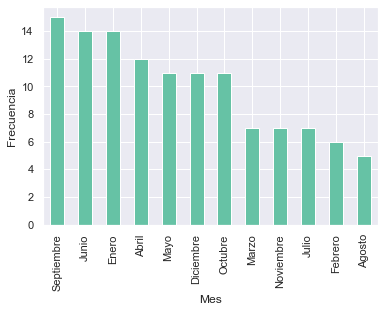

In [7]:
df['Mes'].value_counts().plot(kind='bar', colormap='Set2', xlabel='Mes', ylabel='Frecuencia');

#### En conclusión, septiembre es el mes con más sismos de magnitud mayor a 7.0 en la escala sismológica de magnitud de momento en México

Nota: Este no es un análisis de causalidad ni una predicción, es un ejemplo del uso de la librería pandas. La interpretación se deja al lector ;)